In [83]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

#all_data = pd.read_csv("Listing_Titles.tsv", sep="\t", dtype=str, keep_default_na=False, na_values=[""], quoting=csv.QUOTE_NONE)

In [7]:
train_df = pd.read_csv("Train_Tagged_Titles.tsv", sep="\t", dtype=str, keep_default_na=False, na_values=[""], quoting=csv.QUOTE_NONE)

In [14]:
train_df["Record Number"] = train_df["Record Number"].astype(int)

In [18]:
train_df

,Record Number,Title,Token,Tag
0,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,Modell
1,1,Supreme Nike SB Dunk High By any Means Red US1...,Nike,Marke
2,1,Supreme Nike SB Dunk High By any Means Red US1...,SB,Produktlinie
3,1,Supreme Nike SB Dunk High By any Means Red US1...,Dunk,NaN
4,1,Supreme Nike SB Dunk High By any Means Red US1...,High,Schuhschaft-Typ
...,...,...,...,...
55178,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Sportschuhe,Produktart
55179,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Wanderschuh,NaN
55180,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Big,No Tag
55181,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Size,No Tag


In [20]:
x = train_df.loc[train_df["Record Number"] == 1, :]

In [10]:
#all_data.head()

,Record Number,Title
0,1,Supreme Nike SB Dunk High By any Means Red US1...
1,2,New Balance 530 Männer und Frauen Laufschuhe m...
2,3,♥ MICHAEL KORS Sneaker Gr 39 ♥
3,4,New Balance ML 574 EGO Turnschuhe grün
4,5,"Nike air jordan 9 og , space jam , hare , bugs..."


<h2>Preprocessing + EDA</h2>
<h3> Undertand the nature of the training data, counts of different tokens + tags </h3>

First, we need to build the multi-token entities from NaNs.

Example 1

In [67]:
drop_i = []
df1 = x.assign(na = df1.Tag.isna())
df1.Tag = df1.Tag.fillna(method="ffill")
for i in range(len(df1)):
    if df1.loc[i, :].na:
        df1.loc[i, "Token"] = df1.loc[i-1, "Token"] + " " + df1.loc[i, "Token"]
        drop_i.append(i-1)
    else:
        df1 = df1.drop(drop_i)
        drop_i = []
df1 = df1.drop(drop_i)
df1

,Record Number,Title,Token,Tag,na
0,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,Modell,False
1,1,Supreme Nike SB Dunk High By any Means Red US1...,Nike,Marke,False
3,1,Supreme Nike SB Dunk High By any Means Red US1...,SB Dunk,Produktlinie,True
4,1,Supreme Nike SB Dunk High By any Means Red US1...,High,Schuhschaft-Typ,False
7,1,Supreme Nike SB Dunk High By any Means Red US1...,By any Means,Modell,True
8,1,Supreme Nike SB Dunk High By any Means Red US1...,Red,Farbe,False
9,1,Supreme Nike SB Dunk High By any Means Red US1...,US10,US-Schuhgröße,False
10,1,Supreme Nike SB Dunk High By any Means Red US1...,EU44,EU-Schuhgröße,False
11,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,No Tag,False
12,1,Supreme Nike SB Dunk High By any Means Red US1...,Box,No Tag,False


In [74]:
df1.loc[df1.Tag != "No Tag", ["Record Number", "Tag", "Token"]].sort_values("Tag").reset_index(drop=True)

,Record Number,Tag,Token
0,1,Akzente,Logo
1,1,EU-Schuhgröße,EU44
2,1,Farbe,Red
3,1,Marke,Nike
4,1,Modell,Supreme
5,1,Modell,By any Means
6,1,Produktlinie,SB Dunk
7,1,Produktlinie,Air Force
8,1,Schuhschaft-Typ,High
9,1,US-Schuhgröße,US10


Repeat this for all the entries in train (inefficient)

In [77]:
drop_i = []
train_df1 = train_df.assign(na = train_df.Tag.isna())
train_df1.Tag = train_df1.Tag.fillna(method="ffill")
for i in range(len(train_df1)):
    if train_df1.loc[i, :].na:
        train_df1.loc[i, "Token"] = train_df1.loc[i-1, "Token"] + " " + train_df1.loc[i, "Token"]
        drop_i.append(i-1)
    else:
        train_df1 = train_df1.drop(drop_i)
        drop_i = []
train_df1 = train_df1.drop(drop_i)
train_df1

,Record Number,Title,Token,Tag,na
0,1,Supreme Nike SB Dunk High By any Means Red US1...,Supreme,Modell,False
1,1,Supreme Nike SB Dunk High By any Means Red US1...,Nike,Marke,False
3,1,Supreme Nike SB Dunk High By any Means Red US1...,SB Dunk,Produktlinie,True
4,1,Supreme Nike SB Dunk High By any Means Red US1...,High,Schuhschaft-Typ,False
7,1,Supreme Nike SB Dunk High By any Means Red US1...,By any Means,Modell,True
...,...,...,...,...,...
55177,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Sneaker,Stil,False
55179,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Sportschuhe Wanderschuh,Produktart,True
55180,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Big,No Tag,False
55181,5000,Herren Trekking Schuhe Outdoor Sneaker Sportsc...,Size,No Tag,False


In [112]:
train_ner = train_df1.loc[train_df1.Tag != "No Tag", ["Record Number", "Tag", "Token"]].sort_values("Tag").reset_index(drop=True)
train_ner

,Record Number,Tag,Token
0,1665,Abteilung,Damen
1,2391,Abteilung,Damen
2,2390,Abteilung,Unisex
3,1944,Abteilung,Mann Frau
4,3809,Abteilung,Damen
...,...,...,...
34660,717,Zwischensohlen-Typ,SOFT FOAM
34661,3672,Zwischensohlen-Typ,Croslite
34662,3242,Zwischensohlen-Typ,Foam
34663,599,Zwischensohlen-Typ,Cloudfoam


<h3>Basic count-based EDA</h3>

Tag Counts

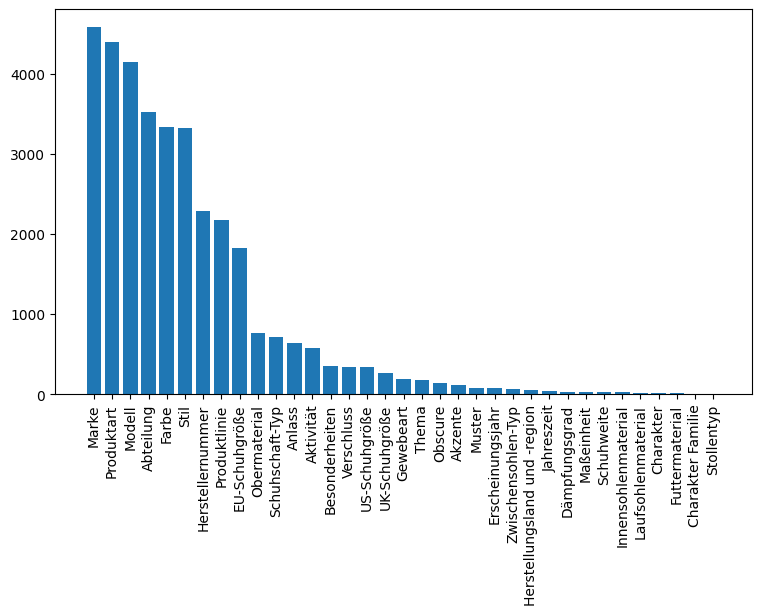

In [147]:
tag_counts = train_ner.groupby("Tag").count()["Token"].sort_values(ascending=False)

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.bar(tag_counts.index, tag_counts.values.flatten(), )
plt.xticks(tag_counts.index, rotation=90)
plt.show()

In [118]:
tag_counts.sort_values(ascending=False).head(10) # top 10 tags

Tag
Marke               4576
Produktart          4390
Modell              4147
Abteilung           3518
Farbe               3335
Stil                3327
Herstellernummer    2281
Produktlinie        2172
EU-Schuhgröße       1829
Obermaterial         766
Name: Token, dtype: int64

Tag-Entity Pairs

In [139]:
by_tagtoken = train_ner.groupby(["Tag", "Token"]).count().sort_values("Record Number", ascending=False).reset_index()
by_tagtoken
# top 25 most common tag-entity pairs

,Tag,Token,Record Number
0,Stil,Sneaker,2550
1,Abteilung,Herren,1252
2,Produktart,Schuhe,1039
3,Abteilung,Damen,962
4,Marke,Nike,605
...,...,...,...
9996,Herstellernummer,DD9478-100,1
9997,Herstellernummer,DD7120-100,1
9998,Herstellernummer,DD7120-001,1
9999,Herstellernummer,DD7120 100 362L,1


In [136]:
len(pd.unique(by_tagtoken.Token)) #Notice that this is NOT equal to most common tokens
# a token can be attributed to a different tag

9864

In [140]:
ent25 = by_tagtoken.head(25)
ent25

,Tag,Token,Record Number
0,Stil,Sneaker,2550
1,Abteilung,Herren,1252
2,Produktart,Schuhe,1039
3,Abteilung,Damen,962
4,Marke,Nike,605
5,Stil,Sneakers,441
6,Produktart,Turnschuhe,416
7,Marke,Adidas,405
8,Produktart,Sportschuhe,341
9,Marke,adidas,335


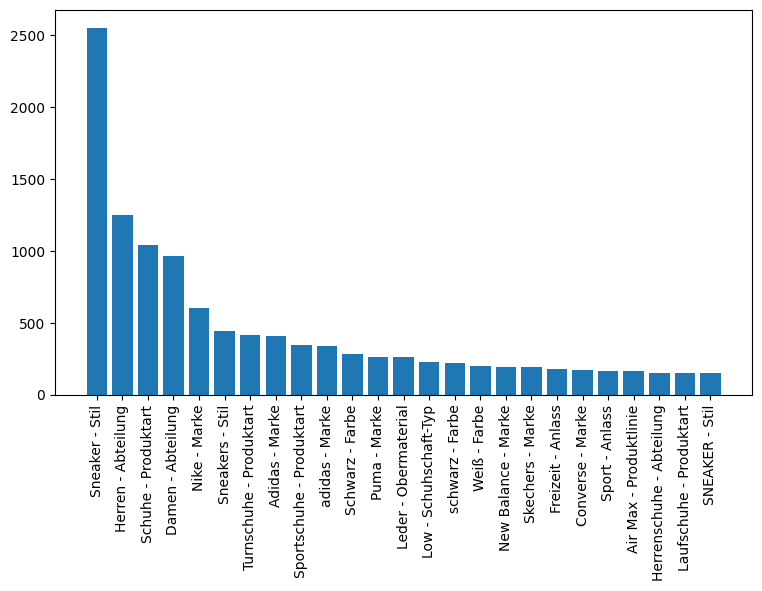

In [149]:
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.bar(ent25.Token + " - " + ent25.Tag, ent25["Record Number"])
plt.xticks(ent25.Token + " - " + ent25.Tag, rotation=90)
plt.show()

Idea for a dummy model: when you see a word, classify it has the max count probability of the corresponding tags for that word.

Most frequent unigrams, bigrams, and trigrams

Analyzing the Titles

In [155]:
titles = train_df.loc[:, ["Record Number", "Title"]].drop_duplicates().set_index("Record Number")
titles

,Title
Record Number,
1,Supreme Nike SB Dunk High By any Means Red US1...
2,New Balance 530 Männer und Frauen Laufschuhe m...
3,♥ MICHAEL KORS Sneaker Gr 39 ♥
4,New Balance ML 574 EGO Turnschuhe grün
5,"Nike air jordan 9 og , space jam , hare , bugs..."
...,...
4996,Adidas Raf Simons Sneakers
4997,"Ludwig Reiter Andalusier , Nubuk navy Schuhe D..."
4998,Adidas Superstar Laceless / Adidas Originals /...


In [164]:
title_word_counts = np.sum(~titles.Title.str.split(" ", expand=True).isna(), axis=1)
title_word_counts.mean(), title_word_counts.std()

(11.0366, 3.109146795948971)

In [178]:
longest_titles = pd.DataFrame(title_word_counts.sort_values(ascending=False)).reset_index().rename(columns={0:"Words"})
longest_titles = longest_titles.merge(titles.reset_index(), how="left")
longest_titles

,Record Number,Words,Title
0,4315,28,"Asics Gel-Lyte III "" Holiday Pack "" ( HL6A2-21..."
1,1518,23,"adidas ZX 8000 Hanami "" Yozakura "" grey US 7 8..."
2,547,23,"Adidas ZX 8000 Atmos G-SNK 4 , ( Germany ) , E..."
3,2491,23,adidas ZX 1000 C A-ZX Retro ( 2020 ) US 7 9 10...
4,76,22,"TOP NIKE AIR MAX PLUS NIC QS Gr .43 "" MULTI CO..."
...,...,...,...
4995,4610,2,Vans Ward
4996,4916,2,adidas allround
4997,4565,2,Gucci Pumps
4998,499,2,adidas Puremotion


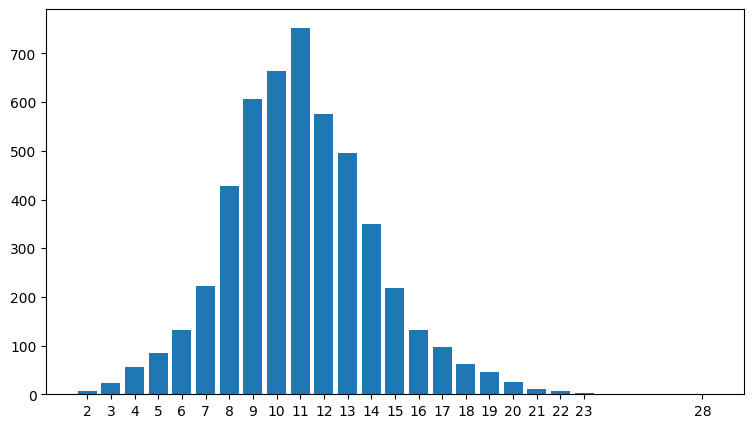

In [183]:
title_vcs = longest_titles.Words.value_counts()

fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.bar(title_vcs.index, title_vcs)
plt.xticks(title_vcs.index)
plt.show()

Pretty normally distributed sentence lengths around 11.